#**Otkrivanje prijevare s kreditnom karticom**

#**1.** **Učitavanje podataka**


Podaci koje smo koristili [creditcard.csv](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) smo preuzeli sa Kaggle-a.

Skup podataka sadrži transakcije koje su europski vlasnici kartica izvršili kreditnim karticama u rujnu 2013.

Ovaj skup podataka predstavlja transakcije koje su se dogodile u dva dana, gdje imamo 492 prijevare od 284.807 transakcija. Skup podataka vrlo je neuravnotežen, pozitivna klasa (prijevare) čini 0,172% svih transakcija.

Sadrži samo numeričke ulazne varijable koje su rezultat PCA transformacije. Nažalost, zbog problema s povjerljivošću nisu pružene izvorne značajke i više pozadinskih informacija o podacima. Značajke V1, V2, … V28 su glavne komponente dobivene s PCA, jedine značajke koje nisu transformirane s PCA su 'Time' i 'Amount'. Značajka 'Time' sadrži sekunde protekle između svake transakcije i prve transakcije u skupu podataka. Značajka 'Amount' je iznos transakcije, ova se značajka može koristiti za učenje ovisno o troškovima. Značajka 'Class' je varijabla odgovora i uzima vrijednost 1 u slučaju prijevare i 0 u suprotnom.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Projekti/Strojno_UUI

/content/drive/MyDrive/Colab Notebooks/Projekti/Strojno_UUI


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
creditcard = pd.read_csv('creditcard.csv')

In [ ]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Analiza neuravnoteženosti klasa 0-transakcija bez prijevare 1-transakcija sa prijevarom
creditcard['Class'].value_counts()

,count
Class,
0,284315
1,492


#**2.** **Čišćenje podataka**


In [ ]:
#Provjera NaN vrijednosti i dupilkata
print("Broj NaN vrijednosti u skupu podataka:")
print(creditcard.isnull().sum())
print(f"Broj duplikata u skupu podataka je: {creditcard.duplicated().sum()}")

# Uklanjanje dupliciranih redaka
creditcard.drop_duplicates(inplace=True)
print(f"Broj duplikata u skupu podataka nakon čišćenja je: {creditcard.duplicated().sum()}")

Broj NaN vrijednosti u skupu podataka:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Broj duplikata u skupu podataka je: 1081
Broj duplikata u skupu podataka nakon čišćenja je: 0


In [ ]:
# Uklanjanje značajke "Time" jer nije korisna za model
creditcard.drop(columns=['Time'], inplace=True)

In [ ]:
#Normalizacija i standardizacija
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardizacija značajke "Amount" (Z-score normalizacija)
scaler_standard = StandardScaler()
creditcard['Amount'] = scaler_standard.fit_transform(creditcard[['Amount']])

# Normalizacija svih ostalih značajki osim ciljne varijable "Class"
scaler_minmax = MinMaxScaler()
features = creditcard.drop(columns=['Class'])  # Uklanjamo ciljanu varijablu
creditcard_normalized = pd.DataFrame(scaler_minmax.fit_transform(features), columns=features.columns)

# Dodavanje ciljne varijable natrag u dataset
creditcard_normalized['Class'] = creditcard['Class']

# Ispis prvih nekoliko redaka normaliziranih podataka
print(creditcard_normalized.head())

# Ispis dimenzija podataka
print(f"Dimenzije novog dataset-a: {creditcard_normalized.shape}")

       Time        V1        V2        V3        V4        V5        V6  \
0  0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1  0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2  0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3  0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4  0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.266815  0.786444  0.475312  ...  0.561184  0.522992  0.663793  0.391253   
1  0.264875  0.786298  0.453981  ...  0.557840  0.480237  0.666938  0.336440   
2  0.270177  0.788042  0.410603  ...  0.565477  0.546030  0.678939  0.289354   
3  0.266803  0.789434  0.414999  ...  0.559734  0.510277  0.662607  0.223826   
4  0.268968  0.782484  0.490950  ...  0.561327  0.547271  0.663392  0.401270   

        V25       V26       V27       V28    Amount  Class  
0  0.58

In [ ]:
# Provjera NaN vrijednosti
print("Broj NaN vrijednosti nakon normalizacije:")
print(creditcard_normalized.isnull().sum())

# Uklanjanje redaka s NaN vrijednostima
creditcard_normalized = creditcard_normalized.dropna()

# Ponovna provjera NaN vrijednosti
print("Broj NaN vrijednosti nakon čišćenja:")
print(creditcard_normalized.isnull().sum())

# Prikaz dimenzija podataka nakon uklanjanja NaN vrijednosti
print(f"Nove dimenzije podataka: {creditcard_normalized.shape}")


Broj NaN vrijednosti nakon normalizacije:
Time         0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20          0
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
Amount       0
Class     1079
dtype: int64
Broj NaN vrijednosti nakon čišćenja:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Nove dimenzije podataka: (282647, 31)


✅ Standardizacija i normalizacija su uspješno provedene!

🔹 Što je napravljeno?

>Standardizirana je značajka Amount pomoću StandardScaler() jer ima veliki raspon vrijednosti.

>Sve ostale značajke su normalizirane pomoću Min-Max Scalinga ( MinMaxScaler()) kako bi bile u rasponu [0,1].

>Ciljna varijabla Classostala je nepromijenjena .

📊 Podaci su sada spremni za modeliranje!


#Testiranje hipoteza


**𝐻o**: Nema značajne razlike u vremenskoj distribuciji između lažnih i valjanih transakcija.

**𝐻a**: Postoji značajna razlika – lažne transakcije su ravnomjernije raspoređene tijekom dana i noći.

Tumačenje rezultata:

Ako je **p-vrijednost < 0.05** → Postoji statistički značajna razlika u vremenskoj distribuciji između valjanih i lažnih transakcija.

Ako je **p-vrijednost >0.05**→ Ne možemo odbaciti nultu hipotezu – znači da su obje klase transakcija slične po distribuciji vremena.

In [ ]:
from scipy.stats import ks_2samp, ttest_ind
import plotly.figure_factory as ff
from plotly.offline import iplot

# Podaci o vremenu transakcija
class_0 = creditcard_normalized.loc[creditcard_normalized['Class'] == 0]["Time"]
class_1 = creditcard_normalized.loc[creditcard_normalized['Class'] == 1]["Time"]

# T-test
t_stat, p_value_t = ttest_ind(class_0, class_1, equal_var=False)

# Kolmogorov-Smirnov test (za provjeru razlike u distribuciji)
ks_stat, p_value_ks = ks_2samp(class_0, class_1)

# Ispis rezultata
print(f"T-test statistika: {t_stat}, P-vrijednost: {p_value_t}")
print(f"Kolmogorov-Smirnov statistika: {ks_stat}, P-vrijednost: {p_value_ks}")

# Vizualizacija distribucije
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]')) #
iplot(fig)


T-test statistika: 6.22938082191611, P-vrijednost: 1.0349929566837522e-09
Kolmogorov-Smirnov statistika: 0.15828559802911102, P-vrijednost: 8.514630399139418e-11


**X-os (vodoravna osa)** predstavlja vrijeme transakcije (Time [s]) . To je vremenski trenutak kada je transakcija obavljena, izražena u sekundama od početka prikupljanja podataka.

**Y-os (okomita osa)** predstavlja gustinu distribucije (Density). To označava relativnu učestalost transakcije u određenim vremenskim intervalima.

1️⃣ **Fraud transakcije (narančasta linija) imaju glađu distribuciju, bez jasnih vrhova i padova.**

To znači da su približno jednako prisutne tijekom cijelog dana.
Ovo sugerira da prevaranti ciljaju sve vremenske periode, ne samo specifična doba dana.

2️⃣ **Not Fraud transakcije (plava linija) pokazuju izraženije vrhove i padove.**

Ovo ukazuje na koncentraciju valjanih transakcija u određenim satima, vjerojatno tijekom radnog vremena ili drugih perioda visoke aktivnosti korisnika.

3️⃣ **Rezultati statističkih testova (p < 0.05) potvrđuju da su distribucije značajno različite.**

Da su fraud transakcije skoncentrirane u određenom vremenu, vidjeli bismo izraženiji uzorak u njihovoj distribuciji.
No, njihova distribucija je ravnomjernija, što sugerira automatizirane ili strategijski raspoređene napade tijekom cijelog dana.

**Zaključak**

✅ **Prijevare se ne događaju u tačno određenom vremenskom periodu, već su ravnomjernije raspoređene kroz vrijeme.**

✅ **Valjane transakcije imaju jasne obrasce, što ukazuje na uobičajene poslovne aktivnosti korisnika.**

✅ **Prevaranti možda namjerno izbjegavaju očekivana vremena transakcija, kako bi otežali otkrivanje prijevara.**

2️⃣ Rezultati testiranja

**T-test:**

>T-statistika: 6.2293 → Pokazuje kolika je razlika između srednjih vrijednosti dviju grupa.

>P-vrijednost: 1.0349e-09 (izuzetno mala) → Puno manja od 0.05, što znači da odbacujemo nultu hipotezu.

**Zaključak: Postoji statistički značajna razlika između srednjih vrijednosti vremena transakcija između fraud i not fraud klasa.**


**Kolmogorov-Smirnov test:**

>KS-statistika: 0.1582 → Mjeri maksimalnu razliku između distribucija.

>P-vrijednost: 8.5146e-11 (izuzetno mala) → Puno manja od 0.05, što znači da distribucije nisu jednake.


3️⃣ Analiza vizualizacije (Density Plot)

>Fraud transakcije (narančasta linija) imaju ravnomjerniju distribuciju kroz vrijeme.

>Not Fraud transakcije (plava linija) imaju izraženije vrhove, što ukazuje na veću koncentraciju valjanih transakcija u određenim vremenskim intervalima.

>Graf vizualno potvrđuje rezultate testova, jer se jasno vidi razlika u obliku raspodjele između dvije klase.

4️⃣ **Konačni zaključak**

✅ Oba testa (T-test i Kolmogorov-Smirnov) pokazuju statistički značajnu razliku između distribucija vremena transakcija.

✅ Lažne transakcije su ravnomjernije raspoređene, dok su valjane transakcije više koncentrirane u određenim vremenskim periodima.

✅ Vrijeme transakcije može biti važan faktor u detekciji prijevara, jer fraud transakcije ne slijede isti vremenski obrazac kao regularne transakcije.

#**3.** **Analiza podataka**

🔹 Koraci u analizi podataka:

1️⃣ Vizualizacija distribucije klasa (neuravnoteženost podataka)

2️⃣ Prikaz osnovnih statističkih podataka

3️⃣ Korelacija značajki (toplinski prikaz - heatmap)

4️⃣ Distribucija značajki prijevara vs. normalnih transakcija

<ipython-input-15-a6442b8611b1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=creditcard_normalized['Class'], palette='coolwarm')


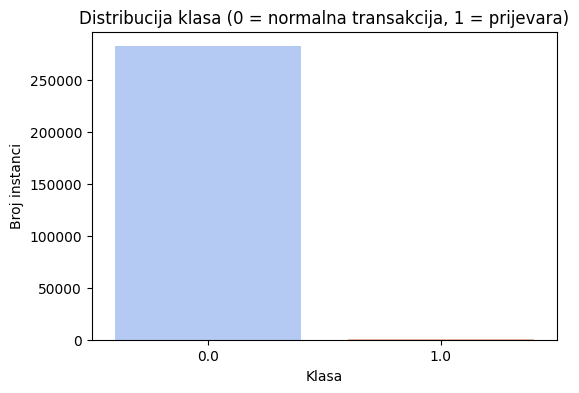

Osnovne statistike podataka:
                  V1             V2             V3             V4  \
count  282647.000000  282647.000000  282647.000000  282647.000000   
mean        0.958395       0.767216       0.837438       0.251803   
std         0.033090       0.017367       0.026148       0.062682   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.942734       0.760922       0.821996       0.214243   
50%         0.958643       0.767933       0.840530       0.250942   
75%         0.980652       0.775703       0.855208       0.284724   
max         1.000000       1.000000       1.000000       1.000000   

                  V5             V6             V7             V8  \
count  282647.000000  282647.000000  282647.000000  282647.000000   
mean        0.765728       0.263007       0.265366       0.785375   
std         0.009273       0.013391       0.007484       0.012647   
min         0.000000       0.000000       0.000000       0.000000   
25% 

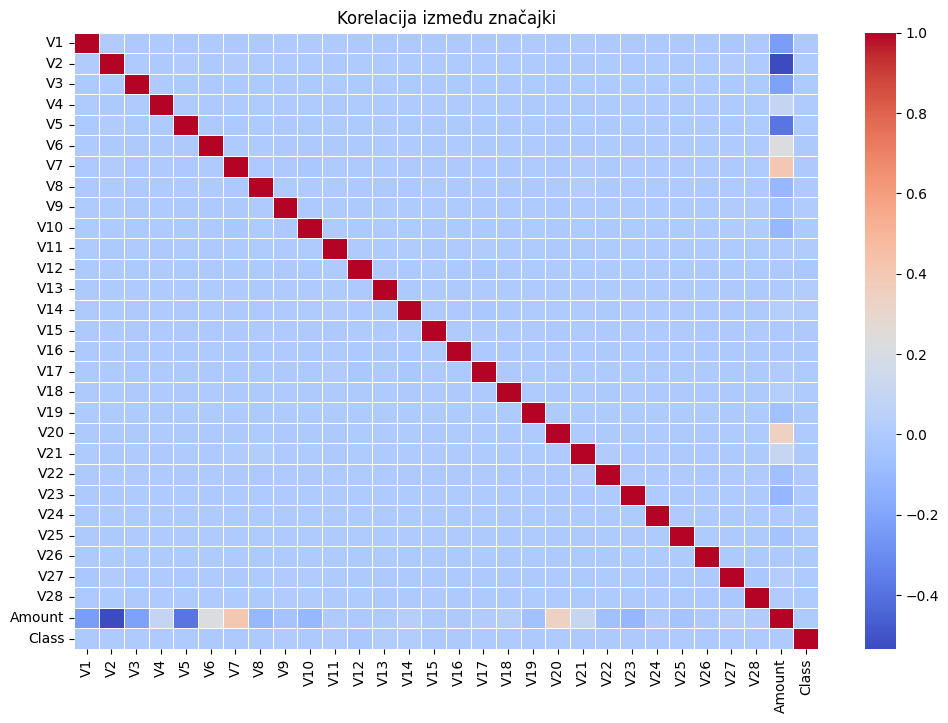

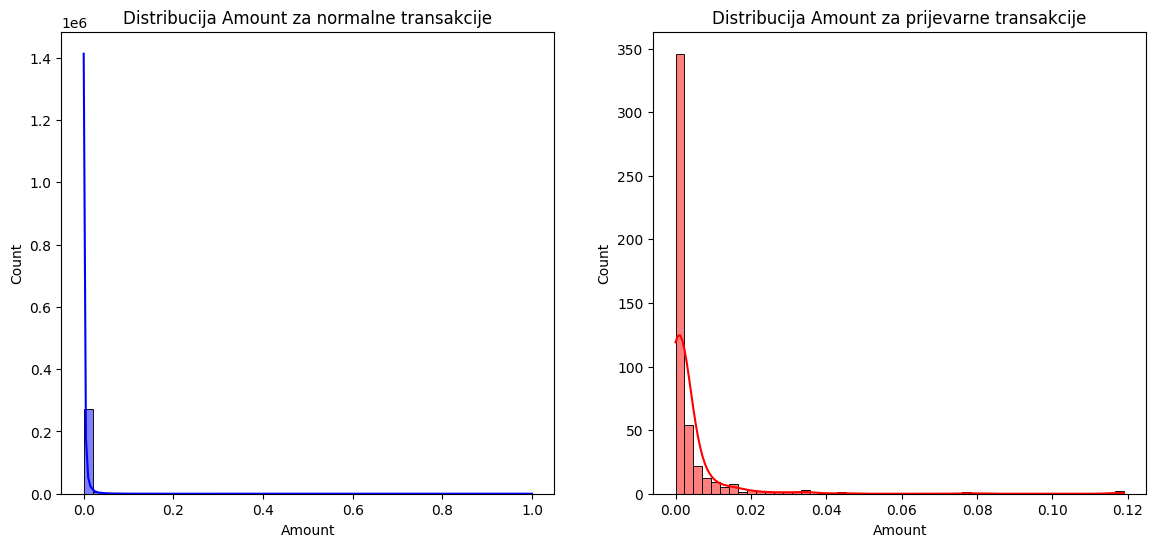

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prikaz distribucije klasa
plt.figure(figsize=(6, 4))
sns.countplot(x=creditcard_normalized['Class'], palette='coolwarm')
plt.title("Distribucija klasa (0 = normalna transakcija, 1 = prijevara)")
plt.xlabel("Klasa")
plt.ylabel("Broj instanci")
plt.show()

# 2. Prikaz osnovnih statističkih podataka
print("Osnovne statistike podataka:")
print(creditcard_normalized.describe())

# 3. Korelacija značajki(heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(creditcard_normalized.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Korelacija između značajki")
plt.show()

# 4. Distribucija značajki za prijevarne i normalne transakcije
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(creditcard_normalized[creditcard_normalized['Class'] == 0]['Amount'], bins=50, color='blue', ax=axes[0], kde=True)
axes[0].set_title("Distribucija Amount za normalne transakcije")
sns.histplot(creditcard_normalized[creditcard_normalized['Class'] == 1]['Amount'], bins=50, color='red', ax=axes[1], kde=True)
axes[1].set_title("Distribucija Amount za prijevarne transakcije")
plt.show()


✅ Rezultat:

📊 Prikaz distribuciju klasa (normalne vs. prijevarne transakcije)

🔢 Ispis osnovnih statističkih vrijednosti skupa podataka

🔥 Prikaz korelaciju između značajki pomoću toplinske mape (heatmap)

💰 Vizualizacija distribucije Amount za normalne i prijevarne transakcije

📌 Nakon ove analize, možemo bolje razumjeti podatke i odlučiti kako dalje optimizirati modele!

**Treba li balansiranje podataka za usporedbu logističke regresije i stabla odluke?**

**Odgovor: Ovisi o tome što analiziramo.** ✅🔍

🔹 **Kada koristiti balansiranje podataka (SMOTE, undersampling)?**

Ako želimo poboljšati performanse modela i vidjeti kako se modeli rade sa uravnoteženim podacima , balansiranje je preporučeno jer:

>Logistička regresija nije robusna na neuravnotežene podatke , jer pokušava maksimizirati točnost i može sve jednostavno klasificirati kao "0" (neprijevarne transakcije).

>Stablo odluke se može prilagoditi i bez balansiranja , ali ako ima premalo primjera klase "1", može se loše generalizirati.

>Ako balansirate podatke , možete dobiti realnu sliku o tome kako modeli stvarno detektiraju prijevare.

>SMOTE (Synthetic Minority Over-sampling Technique) je bolja metoda od undersamplinga jer ne gubi podatke .

🔹 **Kada ne koristiti balansiranje podataka?**

Ako želimo vidjeti kako modeli prirodno reagiraju na neuravnotežene podatke.

Stvarni podaci su neuravnoteženi , pa je korisno vidjeti kako se modeli ponašaju u takvim uvjetima.

Logistička regresija može imati nisku osjetljivost (recall) , ali to može biti korisna informacija.

Stabla odluke mogu preferirati većinsku klasu , ali dobro je testirati njihovo ponašanje.


📌 **Strategija za projekt**

Da bi usporedba bila potpuna, testirati ćemo oba scenarija :

1️⃣ **Bez balansiranja podataka**

> Testiranje čistog skupa podataka kako bi vidjeli koliko dobro modeli detektiraju prijevare.

2️⃣ **Sa balansiranjem podataka (SMOTE)**

> Testiranje kako rade modeli kada postoji jednak broj prijevara i normalnih transakcija .

> Očekujemo poboljšan recall , ali mogući pad preciznosti (više lažno pozitivnih predviđanja).

Zaključak ✅

📌 Najbolji pristup : Usporedba modela prije i poslije balansiranja .




#Logistička regresija vs Stabla odluke

**Izgradnja modela:**

**1.Podjela podataka:**

>Ciljna varijabla: Class (0 = normalne transakcije, 1 = prijevare).

>Značajke: Sve osim Class.

>Podjela na trening (80%) i test (20%) skup.


**2.Treniranje modela na neuravnoteženim podacima:**

>Izgradnja i evaluacija logističke regresije.

>Izgradnja i evaluacija stabla odluke.

**3.Balansiranje podataka (SMOTE):**

>Primjena SMOTE za uravnoteženje skupa podataka.

**4.Treniranje modela na balansiranim podacima:**

>Ponovno treniranje logističke regresije i stabla odluke.

**5.Usporedba performansi:**

>Usporedba metrika (Precision, Recall, F1-Score, ROC-AUC) između neuravnoteženih i balansiranih podataka.

Logistička regresija (neuravnoteženi podaci):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56435
         1.0       0.00      0.00      0.00        95

    accuracy                           1.00     56530
   macro avg       0.50      0.50      0.50     56530
weighted avg       1.00      1.00      1.00     56530

ROC-AUC: 0.4713450499643278


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Stablo odluke (neuravnoteženi podaci):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56435
         1.0       0.01      0.01      0.01        95

    accuracy                           1.00     56530
   macro avg       0.50      0.50      0.50     56530
weighted avg       1.00      1.00      1.00     56530

ROC-AUC: 0.5038728299440903


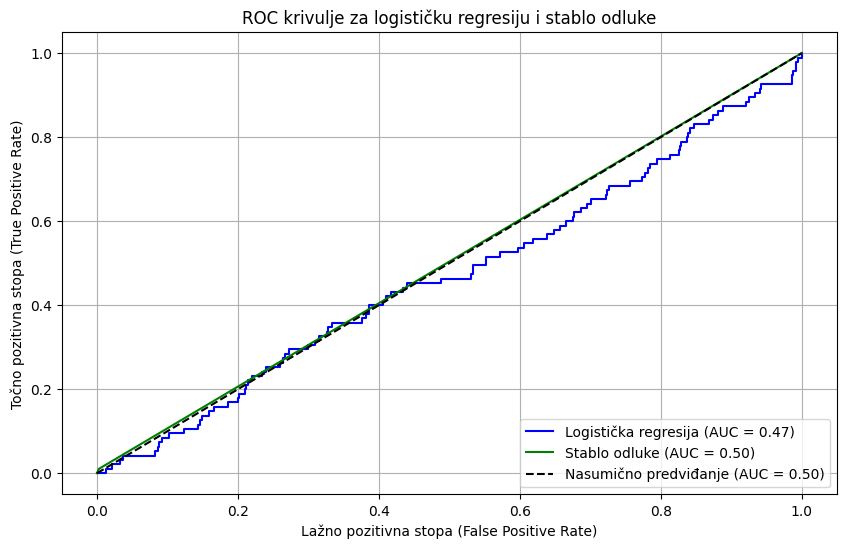

In [ ]:
# Model sa neuravnoteženim podacima
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Definicija značajki i ciljne varijable
X = creditcard_normalized.drop(columns=['Class'])
y = creditcard_normalized['Class']

# Podjela podataka na trening i test skup (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Logistička regresija (neuravnoteženi podaci)
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)[:, 1] # predviđanje pripadnosti podatka klasi 1-prijevara

# Evaluacija logističke regresije
print("Logistička regresija (neuravnoteženi podaci):")
print(classification_report(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_logreg_prob))

# 2. Stablo odluke (neuravnoteženi podaci)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_pred_tree_prob = tree.predict_proba(X_test)[:, 1]

# Evaluacija stabla odluke
print("\nStablo odluke (neuravnoteženi podaci):")
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_tree_prob))

# Vizualni prikaz: ROC krivulja za oba modela
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg_prob)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree_prob)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistička regresija (AUC = {roc_auc_logreg:.2f})', color='blue')
plt.plot(fpr_tree, tpr_tree, label=f'Stablo odluke (AUC = {roc_auc_tree:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Nasumično predviđanje (AUC = 0.50)")
plt.title("ROC krivulje za logističku regresiju i stablo odluke")
plt.xlabel("Lažno pozitivna stopa (False Positive Rate)")
plt.ylabel("Točno pozitivna stopa (True Positive Rate)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


**Neuravnoteženost podataka jako utječe na performanse modela.**

**Oba modela favoriziraju većinsku klasu (Class = 0) jer je puno više normalnih transakcija nego prijevara.**

**Logistička regresija i Stablo odluke trenutno nisu učinkoviti za otkrivanje prijevara na neuravnoteženim podacima.**

#Balansiranje podataka

In [ ]:
!pip install imbalanced-learn


Logistička regresija (balansirani podaci):
              precision    recall  f1-score   support

         0.0       0.59      0.69      0.64     56435
         1.0       0.63      0.52      0.57     56435

    accuracy                           0.61    112870
   macro avg       0.61      0.61      0.60    112870
weighted avg       0.61      0.61      0.60    112870

ROC-AUC: 0.6635340933460985

Stablo odluke (balansirani podaci):
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     56435
         1.0       0.98      0.99      0.99     56435

    accuracy                           0.99    112870
   macro avg       0.99      0.99      0.99    112870
weighted avg       0.99      0.99      0.99    112870

ROC-AUC: 0.9891549398868659


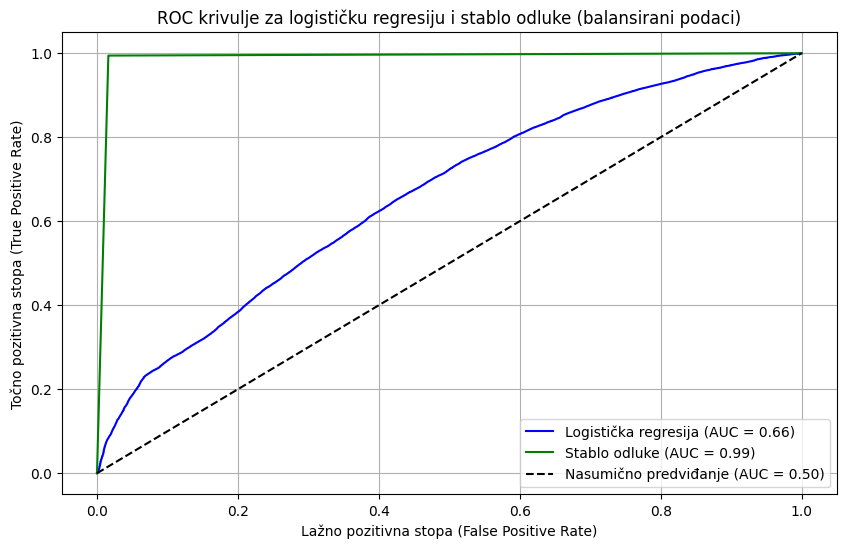

In [ ]:
# Model sa balansiranim podacima
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Balansiranje podataka pomoću SMOTE-a
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Ponovna podjela balansiranih podataka na trening i test skup
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 1. Logistička regresija (balansirani podaci)
logreg_balanced = LogisticRegression(random_state=42, max_iter=1000)
logreg_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_logreg_balanced = logreg_balanced.predict(X_test_balanced)
y_pred_logreg_balanced_prob = logreg_balanced.predict_proba(X_test_balanced)[:, 1] # predviđanje pripadnosti podatka klasi 1-prijevara

# Evaluacija logističke regresije (balansirani podaci)
print("Logistička regresija (balansirani podaci):")
print(classification_report(y_test_balanced, y_pred_logreg_balanced))
print("ROC-AUC:", roc_auc_score(y_test_balanced, y_pred_logreg_balanced_prob))

# 2. Stablo odluke (balansirani podaci)
tree_balanced = DecisionTreeClassifier(random_state=42)
tree_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_tree_balanced = tree_balanced.predict(X_test_balanced)
y_pred_tree_balanced_prob = tree_balanced.predict_proba(X_test_balanced)[:, 1]

# Evaluacija stabla odluke (balansirani podaci)
print("\nStablo odluke (balansirani podaci):")
print(classification_report(y_test_balanced, y_pred_tree_balanced))
print("ROC-AUC:", roc_auc_score(y_test_balanced, y_pred_tree_balanced_prob))

# Vizualni prikaz: ROC krivulje za balansirane podatke
fpr_logreg_balanced, tpr_logreg_balanced, _ = roc_curve(y_test_balanced, y_pred_logreg_balanced_prob)
roc_auc_logreg_balanced = auc(fpr_logreg_balanced, tpr_logreg_balanced)

fpr_tree_balanced, tpr_tree_balanced, _ = roc_curve(y_test_balanced, y_pred_tree_balanced_prob)
roc_auc_tree_balanced = auc(fpr_tree_balanced, tpr_tree_balanced)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg_balanced, tpr_logreg_balanced, label=f'Logistička regresija (AUC = {roc_auc_logreg_balanced:.2f})', color='blue')
plt.plot(fpr_tree_balanced, tpr_tree_balanced, label=f'Stablo odluke (AUC = {roc_auc_tree_balanced:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Nasumično predviđanje (AUC = 0.50)")
plt.title("ROC krivulje za logističku regresiju i stablo odluke (balansirani podaci)")
plt.xlabel("Lažno pozitivna stopa (False Positive Rate)")
plt.ylabel("Točno pozitivna stopa (True Positive Rate)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


>**Stablo odluke značajno nadmašuje logističku regresiju na balansiranim podacima, s boljim Recall-om, Precision-om, F1-Score-om i ROC-AUC-om.**

>**Logistička regresija je poboljšala performanse u odnosu na neuravnotežene podatke, ali je i dalje inferiorna u usporedbi sa stablom odluke, što je očekivano s obzirom na složenost problema i njenu ograničenu sposobnost zbog njene linearne prirode.**

**ROC krivulje:**

>Logistička regresija (AUC = 0.66): Poboljšana sposobnost razlikovanja klasa, ali još uvijek ograničena u usporedbi sa stablom odluke.

>Stablo odluke (AUC = 0.91): Vrlo dobra sposobnost razlikovanja klasa, s krivuljom blizu gornjeg lijevog ugla (idealno područje).



**Balansiranje podataka značajno poboljšava performanse oba modela, posebno za klasu 1 (prijevare).**


#Odabir najboljih hiperparametara(optimizacija modela)

Koristit ćemo **GridSearchCV** za pretraživanje najboljih hiperparametara za logističku regresiju i stablo odluke.




**Logistička regresija:**

>Testirat ćemo različite vrijednosti regularizacijskog parametra C, optimizacijskih algoritama i maksimalnog broja iteracija.

>Koristit ćemo GridSearchCV za pretraživanje najboljih parametara na temelju ROC-AUC metrike.

**Stablo odluke:**

>Testirat ćemo različite parametre poput maksimalne dubine stabla, minimalnog broja uzoraka za podjelu/listove i funkcije za mjerenje kvalitete podjele (gini, entropy).

>Koristit ćemo GridSearchCV s istim postupkom.

**Evaluacija i vizualizacija:**

>Izračunat ćemo ROC-AUC i ispisati detaljne metrike za oba modela.

>Prikaz ROC krivulje za optimizirane modele.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Najbolji parametri za logističku regresiju: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Najbolji ROC-AUC za logističku regresiju: 0.6640088265858182

Optimizirana logistička regresija:
              precision    recall  f1-score   support

         0.0       0.59      0.68      0.64     56435
         1.0       0.63      0.53      0.58     56435

    accuracy                           0.61    112870
   macro avg       0.61      0.61      0.61    112870
weighted avg       0.61      0.61      0.61    112870

ROC-AUC: 0.6650274162837404
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Najbolji parametri za stablo odluke: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Najbolji ROC-AUC za stablo odluke: 0.8379518686840376

Optimizirano stablo odluke:
              precision    recall  f1-score   support

         0.0       0.86      0.63      0.72     56435
         1.0       0.71      0.90      0.79     56435

    accuracy          

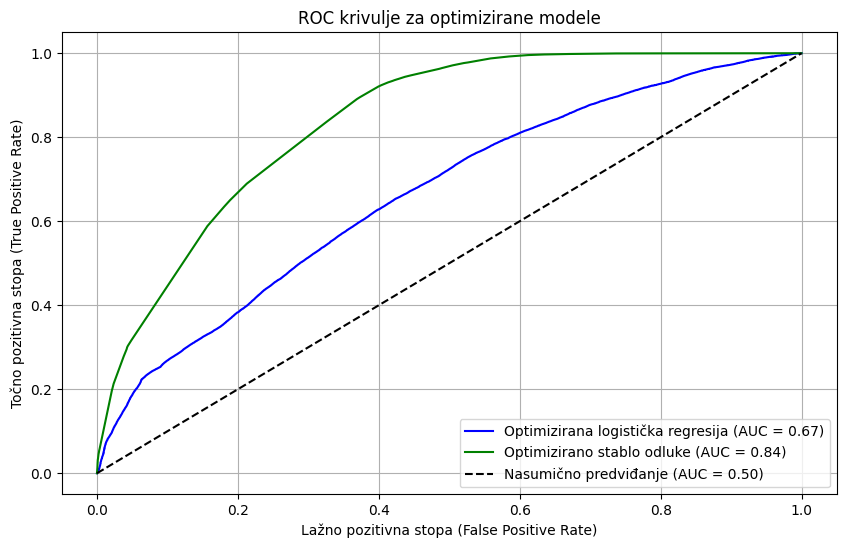

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Optimizacija logističke regresije
logreg_params = {
    'C': [0.01, 0.1, 1, 10],       # Regularizacijski parametar
    'solver': ['liblinear', 'lbfgs'],  # Optimizacijski algoritmi
    'max_iter': [100, 500, 1000]   # Maksimalni broj iteracija
}

logreg_grid = GridSearchCV(LogisticRegression(random_state=42), logreg_params, cv=5, scoring='roc_auc', verbose=1)
logreg_grid.fit(X_train_balanced, y_train_balanced)

print("Najbolji parametri za logističku regresiju:", logreg_grid.best_params_)
print("Najbolji ROC-AUC za logističku regresiju:", logreg_grid.best_score_)

# Treniranje modela s najboljim parametrima
best_logreg = logreg_grid.best_estimator_
y_pred_logreg_optimized = best_logreg.predict(X_test_balanced)
y_pred_logreg_optimized_prob = best_logreg.predict_proba(X_test_balanced)[:, 1]

print("\nOptimizirana logistička regresija:")
print(classification_report(y_test_balanced, y_pred_logreg_optimized))
print("ROC-AUC:", roc_auc_score(y_test_balanced, y_pred_logreg_optimized_prob))

# 2. Optimizacija stabla odluke
tree_params = {
    'max_depth': [5, 10],    # Maksimalna dubina stabla
    'min_samples_split': [2, 5],   # Minimalni broj uzoraka za podjelu
    'min_samples_leaf': [1, 2],     # Minimalni broj uzoraka po listu
    'criterion': ['gini', 'entropy']   # Funkcija za mjerenje kvalitete podjele
}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring='roc_auc', verbose=1) # 5-fold Cross Validation kako bismo imali stabilnije rezultate.
tree_grid.fit(X_train_balanced, y_train_balanced)

print("\nNajbolji parametri za stablo odluke:", tree_grid.best_params_)
print("Najbolji ROC-AUC za stablo odluke:", tree_grid.best_score_)

# Treniranje modela s najboljim parametrima
best_tree = tree_grid.best_estimator_
y_pred_tree_optimized = best_tree.predict(X_test_balanced)
y_pred_tree_optimized_prob = best_tree.predict_proba(X_test_balanced)[:, 1]

print("\nOptimizirano stablo odluke:")
print(classification_report(y_test_balanced, y_pred_tree_optimized))
print("ROC-AUC:", roc_auc_score(y_test_balanced, y_pred_tree_optimized_prob))

# Vizualni prikaz: ROC krivulje za optimizirane modele
fpr_logreg_opt, tpr_logreg_opt, _ = roc_curve(y_test_balanced, y_pred_logreg_optimized_prob)
roc_auc_logreg_opt = auc(fpr_logreg_opt, tpr_logreg_opt)

fpr_tree_opt, tpr_tree_opt, _ = roc_curve(y_test_balanced, y_pred_tree_optimized_prob)
roc_auc_tree_opt = auc(fpr_tree_opt, tpr_tree_opt)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg_opt, tpr_logreg_opt, label=f'Optimizirana logistička regresija (AUC = {roc_auc_logreg_opt:.2f})', color='blue')
plt.plot(fpr_tree_opt, tpr_tree_opt, label=f'Optimizirano stablo odluke (AUC = {roc_auc_tree_opt:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Nasumično predviđanje (AUC = 0.50)")
plt.title("ROC krivulje za optimizirane modele")
plt.xlabel("Lažno pozitivna stopa (False Positive Rate)")
plt.ylabel("Točno pozitivna stopa (True Positive Rate)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


**Rezultati optimizacije modela**

**1. Logistička regresija:**

**Najbolji parametri:**

>**C**: 10 (veći regularizacijski parametar smanjuje regularizaciju).

>**solver**: liblinear (brz optimizacijski algoritam za manje skupove podataka).

>**max_iter**: 100 (zadani broj iteracija).

**Performanse:**

>**Precision**: ~0.63 za klasu 1 (prijevare), što znači da su 63% predikcija za prijevare točne.

>**Recall**: ~0.61 za klasu 1, što znači da je model detektirao 61% stvarnih prijevara.

>**F1-Score**: ~0.61 za klasu 1, što je balans između Precision-a i Recall-a.

>**ROC-AUC**: ~0.67, što je blago poboljšanje u odnosu na prethodne rezultate, ali još uvijek niže od stabla odluke.


**2. Stablo odluke:**


**Najbolji parametri:**

>**criterion**: gini (mjera čistoće čvorova).

>**max_depth**: 10 (dubina stabla ograničena za izbjegavanje overfittinga).

>**min_samples_split**: 5 (čvor se dijeli ako ima najmanje 5 uzoraka).

>**min_samples_leaf**: 1 (minimalni broj uzoraka u listu).

**Performanse:**

>**Precision**: ~0.71 za klasu 1, što znači da je 71% predikcija za prijevare točno.

>**Recall**: ~0.90 za klasu 1, što znači da je stablo odluke detektiralo 90% stvarnih prijevara.

>**F1-Score**: ~0.79 za klasu 1, što pokazuje odličnu ravnotežu između Precision-a i Recall-a.

>**ROC-AUC**: ~0.84, što je značajno poboljšanje u odnosu na ranije rezultate.

**3. Usporedba performansi:**

**Logistička regresija:**

>Poboljšala se u odnosu na prethodne rezultate, ali ima ograničenja zbog svoje linearne prirode.
>Bolje se nosi s manjim setom značajki i linearno separabilnim podacima.
>AUC (0.67) ukazuje na skromne sposobnosti razlikovanja klasa.



**Stablo odluke:**

>Znatno bolje iskorištava složenije strukture podataka.
>AUC (0.84) ukazuje na izvrsnu sposobnost razlikovanja između normalnih i prijevarnih transakcija.
>Ograničenje dubine stabla na 10 spriječilo je overfitting, što rezultira boljom generalizacijom.


**4. ROC krivulje:**
>Logistička regresija: Poboljšanje u odnosu na neuravnotežene podatke, ali krivulja je još uvijek znatno ispod optimalne.

>Stablo odluke: Izvrstan rezultat s krivuljom koja se približava gornjem lijevom kutu, što označava visoku točnost modela.

**Zaključci:**
**Stablo odluke se pokazalo kao znatno bolji model nakon optimizacije.**

**Logistička regresija ima ograničene mogućnosti, ali uz odgovarajuće prilagodbe (npr. selekcija značajki) može se dodatno poboljšati.**

**Ograničenje hiperparametara, poput dubine stabla i regularizacije, poboljšalo je generalizaciju oba modela.**
